# Disclaimer

**Code is provided as is without any warranty for educational purposes. Use at your own risk.**

**Please check out our super easy [Options Simulator](https://optionscrack.in).**

Note that correlation is a statistical measure and does not guarantee future performance. It just shows the tendency based on historical data.

In [1]:
from fyers_api import accessToken
from fyers_api import fyersModel

redirect_uri= "http://127.0.0.1:5000/callback"  
client_id = "I*******-100" ##use your client ID and secret key
secret_key = "U*******"                                        
grant_type = "authorization_code"                 
response_type = "code"                             
state = "sample"                                   


### Connect to the sessionModel object here with the required input parameters
appSession = accessToken.SessionModel(client_id = client_id, redirect_uri = redirect_uri,response_type=response_type,state=state,secret_key=secret_key,grant_type=grant_type)


# ----------------------------------------------------------------------------------
# Replace auth_code

auth_code = "YXQiOjE2OTAzMjcwOTUsImV4cCI6MTY5MDM1NzA5NSwibmJmIjoxNjkwMzI2NDk1LCJhdWQiOiJbXCJkOjFcIiwgXCJkOjJcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYUzM5NTYyIiwib21zIjoiSzEiLCJoc21fa2V5IjoiYTQ0ZGNiZDRjNGQ0NmMyZjg0ZmQ4YWIzZmVlMDJlZWRhMjEzMzYwMDc5NmEzNmI3MTgzZGNjZTIiLCJub25jZSI6IiIsImFwcF9pZCI6IklEWEdOSDdHN0YiLCJ1dWlkIjoiYmQzYjgwYjFjZDI2NGJkNTlhMzZiOWNhZWY2YTVkM2EiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.mLfk6EqdWbuvjtTU-eDNwqSKbfCwSVVldY5BePtqCUg"

# ------------------------------------------------------------------------------------

appSession.set_token(auth_code)
response = appSession.generate_token()

### There can be two cases over here you can successfully get the acccessToken over the request or you might get some error over here. so to avoid that have this in try except block
try: 
    access_token = response["access_token"]
except Exception as e:
    print(e,response)  ## This will help you in debugging then and there itself like what was the error and also you would be able to see the value you got in response variable. instead of getting key_error for unsuccessfull response.


fyers = fyersModel.FyersModel(token=access_token, is_async=False, client_id=client_id, log_path=r"C:\Users\Soorej\Desktop\Series")

In [3]:
import pandas as pd

# List of symbols
symbols = ["NSE:AUBANK-EQ","NSE:AXISBANK-EQ","NSE:BANDHANBNK-EQ","NSE:BANKBARODA-EQ",
           "NSE:FEDERALBNK-EQ","NSE:HDFCBANK-EQ","NSE:ICICIBANK-EQ","NSE:IDFCFIRSTB-EQ",
           "NSE:INDUSINDBK-EQ","NSE:KOTAKBANK-EQ","NSE:PNB-EQ","NSE:SBIN-EQ",
           "NSE:NIFTYBANK-INDEX"]

# Initialize a dictionary to store DataFrames
dfs = {}

# Loop through symbols and call API
for symbol in symbols:
    data = {"symbol": symbol, "resolution":"1D", "date_format":"1", 
            "range_from":"2023-01-01", "range_to":"2023-07-25", "cont_flag":"1"}

    # Get data from fyers
    response = fyers.history(data)

    # If request was successful, create DataFrame and store in dictionary
    if response['s'] == 'ok':
        df = pd.DataFrame(response['candles'], columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        
        # Convert timestamp to datetime and set timezone
        df['date'] = pd.to_datetime(df['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
        
        # Store DataFrame in dictionary
        dfs[symbol] = df


In [19]:
# 120 minute data------------------------------

# Initialize a dictionary to store DataFrames
dfs_120 = {}

# Loop through symbols and call API
for symbol in symbols:
    data_120 = {"symbol": symbol, "resolution":"120", "date_format":"1", 
            "range_from":"2023-05-01", "range_to":"2023-07-25", "cont_flag":"1"}

    # Get data from fyers
    response = fyers.history(data_120)

    # If request was successful, create DataFrame and store in dictionary
    if response['s'] == 'ok':
        df_120 = pd.DataFrame(response['candles'], columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        
        # Convert timestamp to datetime and set timezone
        df_120['date'] = pd.to_datetime(df_120['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
        
        # Store DataFrame in dictionary
        dfs_120[symbol] = df_120

In [31]:
# Initialize a new DataFrame for storing closing prices
closing_prices = pd.DataFrame()

# Loop through symbols and extract closing prices
for symbol, df in dfs.items():
    closing_prices[symbol] = df['close']
# Calculate correlation matrix
correlation_matrix = closing_prices.corr()

# Print the correlation of each symbol with NSE:NIFTYBANK-INDEX
niftybank_index_corr = correlation_matrix["NSE:NIFTYBANK-INDEX"]
print(niftybank_index_corr)


NSE:AUBANK-EQ          0.908569
NSE:AXISBANK-EQ        0.856074
NSE:BANDHANBNK-EQ      0.426048
NSE:BANKBARODA-EQ      0.930120
NSE:FEDERALBNK-EQ     -0.006422
NSE:HDFCBANK-EQ        0.545878
NSE:ICICIBANK-EQ       0.942718
NSE:IDFCFIRSTB-EQ      0.879691
NSE:INDUSINDBK-EQ      0.924315
NSE:KOTAKBANK-EQ       0.834081
NSE:PNB-EQ             0.653809
NSE:SBIN-EQ            0.832290
NSE:NIFTYBANK-INDEX    1.000000
Name: NSE:NIFTYBANK-INDEX, dtype: float64


In [32]:
# Initialize a new DataFrame for storing closing prices
closing_prices_120 = pd.DataFrame()

# Loop through symbols and extract closing prices
for symbol, df_120 in dfs_120.items():
    closing_prices_120[symbol] = df_120['close']
# Calculate correlation matrix
correlation_matrix_120 = closing_prices_120.corr()

# Print the correlation of each symbol with NSE:NIFTYBANK-INDEX
niftybank_index_corr_120 = correlation_matrix_120["NSE:NIFTYBANK-INDEX"]
print(niftybank_index_corr_120)

NSE:AUBANK-EQ          0.483296
NSE:AXISBANK-EQ        0.596579
NSE:BANDHANBNK-EQ     -0.527717
NSE:BANKBARODA-EQ      0.747020
NSE:FEDERALBNK-EQ      0.499707
NSE:HDFCBANK-EQ        0.494610
NSE:ICICIBANK-EQ       0.840076
NSE:IDFCFIRSTB-EQ      0.706233
NSE:INDUSINDBK-EQ      0.863540
NSE:KOTAKBANK-EQ      -0.135244
NSE:PNB-EQ             0.848504
NSE:SBIN-EQ            0.784751
NSE:NIFTYBANK-INDEX    1.000000
Name: NSE:NIFTYBANK-INDEX, dtype: float64


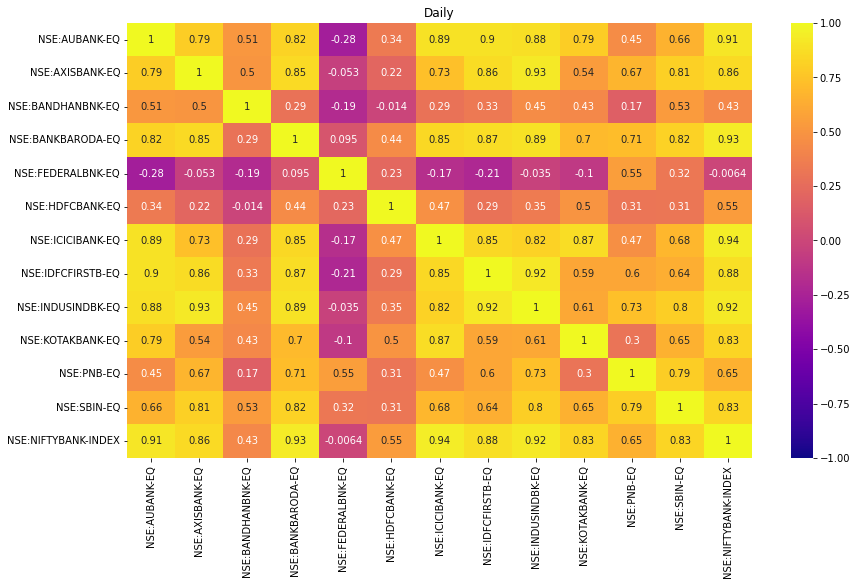

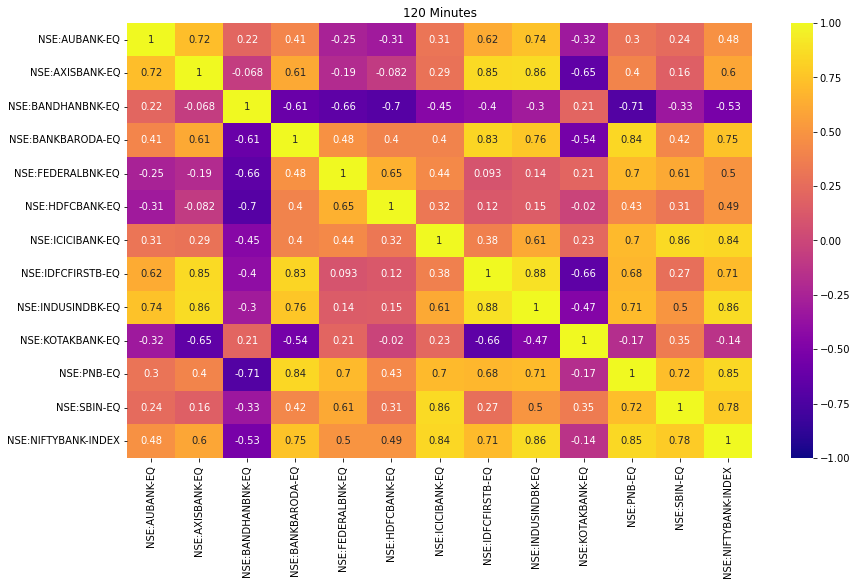

In [46]:
# Heatmap of the full correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', vmin=-1, vmax=1)
plt.title('Daily')
plt.show()

# Heatmap of the full correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix_120, annot=True, cmap='plasma', vmin=-1, vmax=1)
plt.title('120 Minutes')
plt.show()


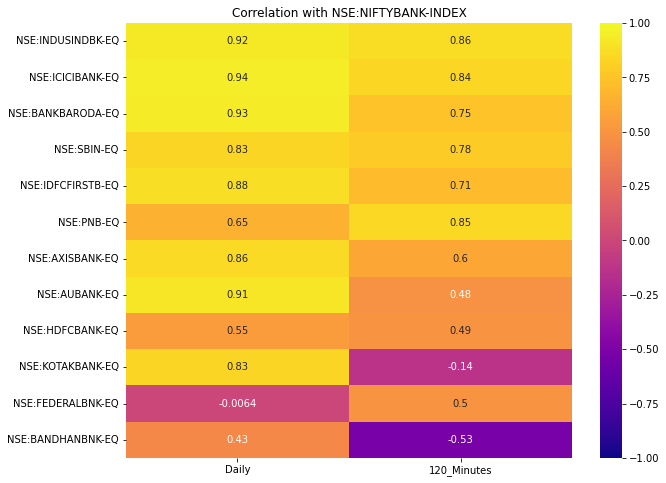

In [50]:
# Extract the correlation with 'NSE:NIFTYBANK-INDEX' from both matrices
daily_corr_with_index = correlation_matrix['NSE:NIFTYBANK-INDEX']
min_120_corr_with_index = correlation_matrix_120['NSE:NIFTYBANK-INDEX']

# Combine the correlations into a DataFrame
corr_df = pd.DataFrame({
    'Daily': daily_corr_with_index,
    '120_Minutes': min_120_corr_with_index
})


# Calculate the total column as the sum of 'Daily' and '120_Minutes'
corr_df['Total'] = corr_df.sum(axis=1)

# Drop the 'NSE:NIFTYBANK-INDEX' row as it will be 1.0 for both and isn't needed
corr_df = corr_df.drop(index='NSE:NIFTYBANK-INDEX')

# Sort the DataFrame based on the 'Total' column in descending order
corr_df = corr_df.sort_values(by='Total', ascending=False)

# Remove the 'Total' column
corr_df.drop(columns='Total', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_df, annot=True, cmap='plasma', vmin=-1, vmax=1)
plt.title('Correlation with NSE:NIFTYBANK-INDEX')
plt.show()


